<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2'

In [4]:
os.listdir(base_path)

['data_add_delta_-2_n20.csv',
 'data_add_delta_-2_n30.csv',
 'data_add_delta_-2_n60.csv',
 'data_add_delta_-2_n120.csv',
 'data_add_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.273290,95.388095,38.148032,-0.019966,195.789450,195.809196,-0.019745
1,0.0,1.0,40.808431,73.089285,25.322121,0.004107,149.223944,149.221162,0.002781
2,0.0,2.0,81.247215,43.770084,51.193309,0.020162,186.230769,186.207212,0.023557
3,0.0,3.0,48.174582,37.394798,52.319453,0.012317,147.901149,147.887886,0.013263
4,0.0,4.0,69.682773,68.067543,31.713100,-0.016905,179.446511,179.462134,-0.015624
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,87.947545,70.591939,46.287091,-0.012949,214.813627,214.825015,-0.011388
249996,999.0,246.0,54.522689,69.947891,28.941198,-0.003658,163.408119,163.410744,-0.002624
249997,999.0,247.0,61.554307,88.496095,92.760693,-0.010110,252.800985,252.808991,-0.008005
249998,999.0,248.0,70.457221,65.033459,93.102270,-0.014868,238.578083,238.588523,-0.010440


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.273290,95.388095,38.148032,-0.019966,195.789450,195.809196,-0.019745
1,0.0,1.0,40.808431,73.089285,25.322121,0.004107,149.223944,149.221162,0.002781
2,0.0,2.0,81.247215,43.770084,51.193309,0.020162,186.230769,186.207212,0.023557
3,0.0,3.0,48.174582,37.394798,52.319453,0.012317,147.901149,147.887886,0.013263
4,0.0,4.0,69.682773,68.067543,31.713100,-0.016905,179.446511,179.462134,-0.015624
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,87.947545,70.591939,46.287091,-0.012949,214.813627,214.825015,-0.011388
249996,999.0,246.0,54.522689,69.947891,28.941198,-0.003658,163.408119,163.410744,-0.002624
249997,999.0,247.0,61.554307,88.496095,92.760693,-0.010110,252.800985,252.808991,-0.008005
249998,999.0,248.0,70.457221,65.033459,93.102270,-0.014868,238.578083,238.588523,-0.010440


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    52.273290  95.388095  38.148032  ...  195.789450  195.809196 -0.019745
      1.0    40.808431  73.089285  25.322121  ...  149.223944  149.221162  0.002781
      2.0    81.247215  43.770084  51.193309  ...  186.230769  186.207212  0.023557
      3.0    48.174582  37.394798  52.319453  ...  147.901149  147.887886  0.013263
      4.0    69.682773  68.067543  31.713100  ...  179.446511  179.462134 -0.015624
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  87.947545  70.591939  46.287091  ...  214.813627  214.825015 -0.011388
      246.0  54.522689  69.947891  28.941198  ...  163.408119  163.410744 -0.002624
      247.0  61.554307  88.496095  92.760693  ...  252.800985  252.808991 -0.008005
      248.0  70.457221  65.033459  93.102270  ...  238.578083  238.588523 -0.010440
      249.0  83.215140  56.660685  33.535211  ...  183.397918  183.408636 -0.010718

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    52.273290  95.388095  38.148032  ...  195.789450  195.809196 -0.019745
      1.0    40.808431  73.089285  25.322121  ...  149.223944  149.221162  0.002781
      2.0    81.247215  43.770084  51.193309  ...  186.230769  186.207212  0.023557
      3.0    48.174582  37.394798  52.319453  ...  147.901149  147.887886  0.013263
      4.0    69.682773  68.067543  31.713100  ...  179.446511  179.462134 -0.015624
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  87.947545  70.591939  46.287091  ...  214.813627  214.825015 -0.011388
      246.0  54.522689  69.947891  28.941198  ...  163.408119  163.410744 -0.002624
      247.0  61.554307  88.496095  92.760693  ...  252.800985  252.808991 -0.008005
      248.0  70.457221  65.033459  93.102270  ...  238.578083  238.588523 -0.010440
      249.0  83.215140  56.660685  33.535211  ...  183.397918  183.408636 -0.010718

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.273290,95.388095,38.148032,-0.019966,195.789450,195.809196,-0.019745
1,0.0,1.0,40.808431,73.089285,25.322121,0.004107,149.223944,149.221162,0.002781
2,0.0,2.0,81.247215,43.770084,51.193309,0.020162,186.230769,186.207212,0.023557
3,0.0,3.0,48.174582,37.394798,52.319453,0.012317,147.901149,147.887886,0.013263
4,0.0,4.0,69.682773,68.067543,31.713100,-0.016905,179.446511,179.462134,-0.015624
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,87.947545,70.591939,46.287091,-0.012949,214.813627,214.825015,-0.011388
249996,999.0,246.0,54.522689,69.947891,28.941198,-0.003658,163.408119,163.410744,-0.002624
249997,999.0,247.0,61.554307,88.496095,92.760693,-0.010110,252.800985,252.808991,-0.008005
249998,999.0,248.0,70.457221,65.033459,93.102270,-0.014868,238.578083,238.588523,-0.010440


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    52.273290  95.388095  38.148032  ...  195.789450  195.809196 -0.019745
      1.0    40.808431  73.089285  25.322121  ...  149.223944  149.221162  0.002781
      2.0    81.247215  43.770084  51.193309  ...  186.230769  186.207212  0.023557
      3.0    48.174582  37.394798  52.319453  ...  147.901149  147.887886  0.013263
      4.0    69.682773  68.067543  31.713100  ...  179.446511  179.462134 -0.015624
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  87.947545  70.591939  46.287091  ...  214.813627  214.825015 -0.011388
      246.0  54.522689  69.947891  28.941198  ...  163.408119  163.410744 -0.002624
      247.0  61.554307  88.496095  92.760693  ...  252.800985  252.808991 -0.008005
      248.0  70.457221  65.033459  93.102270  ...  238.578083  238.588523 -0.010440
      249.0  83.215140  56.660685  33.535211  ...  183.397918  183.408636 -0.010718

[250000 rows x 7 columns]

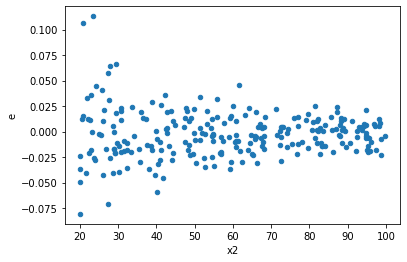

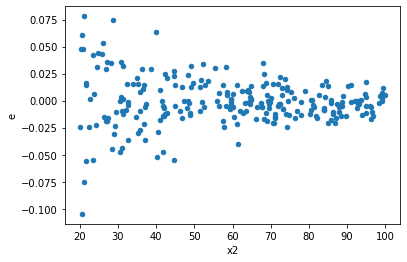

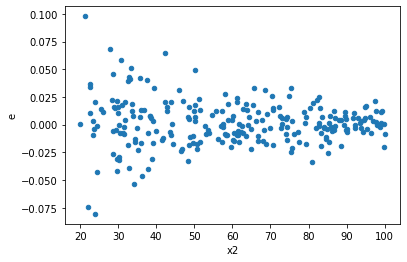

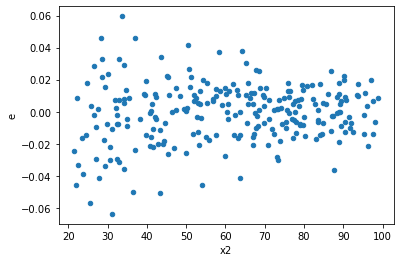

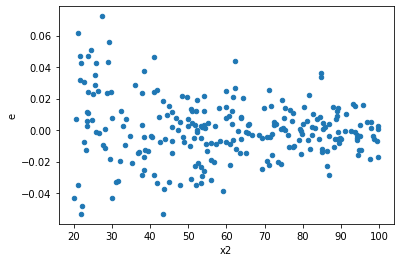

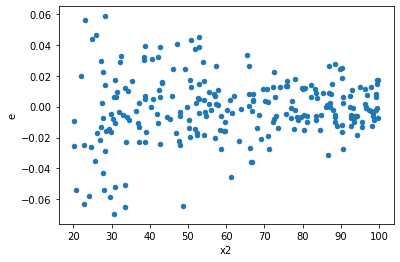

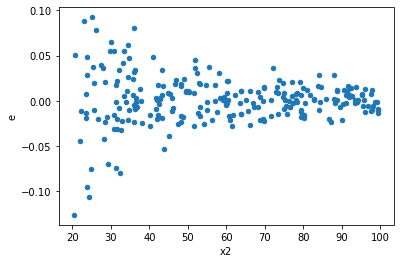

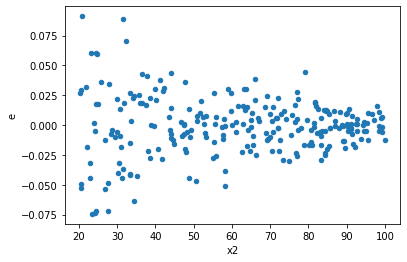

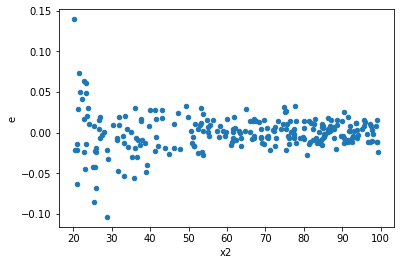

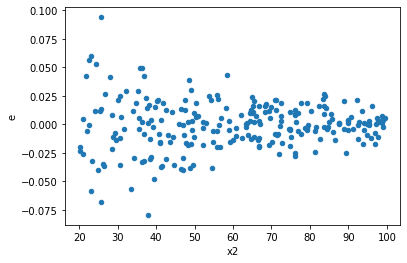

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,0.09594172707846553,0.01456951262671055,0.0009890899698810878,0.00015020116110010877,0.1518579357529695,3.807745284666505e-18,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,0.09875876805981124,0.010591030827921344,0.00101813162948259,0.00010918588482393137,0.10724142307554001,7.578815552534742e-24,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,0.08125811260433098,0.015437085418724916,0.0008377125010755771,0.00015914521050231872,0.1899759288514675,9.101639535218489e-15,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,0.04981946535067114,0.014857517559210562,0.0005136027355739293,0.0001531702841155728,0.29822715789161736,7.673010269567394e-09,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,0.06132095833388162,0.014185496039981529,0.0006321748281843466,0.00014624222721630443,0.2313319365092771,5.0628522381086875e-12,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,0.07354289840539402,0.014229219494420443,0.0007581742103648868,0.00014669298447856128,0.1934818970009047,1.6725999487643282e-14,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,0.15136064754302336,0.013785380636676203,0.0015604190468352923,0.00014211732615130107,0.09107638517969337,1.106595285201136e-26,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,0.11492963325693578,0.017160182287427456,0.0011848415799684102,0.0001769090957466748,0.1493103371265815,2.0672870657988623e-18,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,0.10802162509308834,0.014022489193543443,0.0011136250009596736,0.00014456174426333445,0.12981187036817368,1.1801369529891865e-20,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64